BOLA

In [76]:
import pandas as pd

# Load the CSV

df_ball = pd.read_csv('Data/alice_18_06/name_age_sex_tennis-exp_vr-exp_ball-tracker_2025-06-18_16-13-39..csv')

df_ball['hit'] = None

# Identify collisions ball and racket
hit_events = df_ball['event'].str.contains('RacketHit', na=False)

# Mark hits 
df_ball.loc[hit_events, 'hit'] = True
df_ball.loc[~hit_events, 'hit'] = False

# Mark TrialStart
df_ball['TrialStart'] = None
spawned_events = df_ball['event'].str.contains('TrialStart', na=False)
df_ball.loc[spawned_events, 'TrialStart'] = True
df_ball.loc[~spawned_events, 'TrialStart'] = False

# Identify court collisions
df_ball['Court_Enter'] = None
court_events = df_ball['event'].str.contains('CourtEnter', na=False)
df_ball.loc[court_events, 'Court_Enter'] = True
df_ball.loc[~court_events, 'Court_Enter'] = False

# Identify Net collisions
df_ball['Net_Enter'] = None
net_events = df_ball['event'].str.contains('NetEnter', na=False)
df_ball.loc[net_events, 'Net_Enter'] = True
df_ball.loc[~net_events, 'Net_Enter'] = False

# Delete the Event column
df_ball = df_ball.drop(columns=['event'])
# Convert Pos and Rot columns to numeric, coercing errors
df_ball[['time', 'position.x', 'position.y', 'position.z', 'rotation.x', 'rotation.y', 'rotation.z', 'rotation.w']] = df_ball[['time', 'position.x', 'position.y', 'position.z', 'rotation.x', 'rotation.y', 'rotation.z', 'rotation.w']].apply(pd.to_numeric, errors='coerce')

# --- Dividir por stage ---
df_ball_stage0 = df_ball[df_ball["stage"] == 0]
df_ball_stage1 = df_ball[df_ball["stage"] == 1]
df_ball_stage2 = df_ball[df_ball["stage"] == 2]

Centro das cordas da raquete

In [77]:
import pandas as pd

# Load the CSV

df_center = pd.read_csv('Data/alice_18_06/name_age_sex_tennis-exp_vr-exp_racket-stringbed-center_2025-06-18_16-14-01..csv')

df_center['hit'] = None

# Identify collisions ball and racket
hit_events = df_center['event'].str.contains('RacketHit', na=False)

# Mark hits 
df_center.loc[hit_events, 'hit'] = True
df_center.loc[~hit_events, 'hit'] = False

# Mark TrialStart
df_center['TrialStart'] = None
spawned_events = df_center['event'].str.contains('TrialStart', na=False)
df_center.loc[spawned_events, 'TrialStart'] = True
df_center.loc[~spawned_events, 'TrialStart'] = False

# Identify court collisions
df_center['Court_Enter'] = None
court_events = df_center['event'].str.contains('CourtEnter', na=False)
df_center.loc[court_events, 'Court_Enter'] = True
df_center.loc[~court_events, 'Court_Enter'] = False

# Identify Net collisions
df_center['Net_Enter'] = None
net_events = df_center['event'].str.contains('NetEnter', na=False)
df_center.loc[net_events, 'Net_Enter'] = True
df_center.loc[~net_events, 'Net_Enter'] = False

# Delete the Event column
df_center = df_center.drop(columns=['event'])
# Convert Pos and Rot columns to numeric, coercing errors
df_center[['time', 'position.x', 'position.y', 'position.z', 'rotation.x', 'rotation.y', 'rotation.z', 'rotation.w']] = df_center[['time', 'position.x', 'position.y', 'position.z', 'rotation.x', 'rotation.y', 'rotation.z', 'rotation.w']].apply(pd.to_numeric, errors='coerce')

# --- Dividir por stage ---
df_center_stage0 = df_center[df_center["stage"] == 0]
df_center_stage1 = df_center[df_center["stage"] == 1]
df_center_stage2 = df_center[df_center["stage"] == 2]

In [78]:
ball_hits = df_ball[df_ball['hit'] == True]
racket_center = df_center[df_center['hit'] == True]

ball_pos = ball_hits[['position.x', 'position.y', 'position.z']].to_numpy()
racket_pos = racket_center[['position.x', 'position.y', 'position.z']].to_numpy()
quaternions = racket_center[['rotation.x', 'rotation.y', 'rotation.z', 'rotation.w']].to_numpy()

STAGE 0

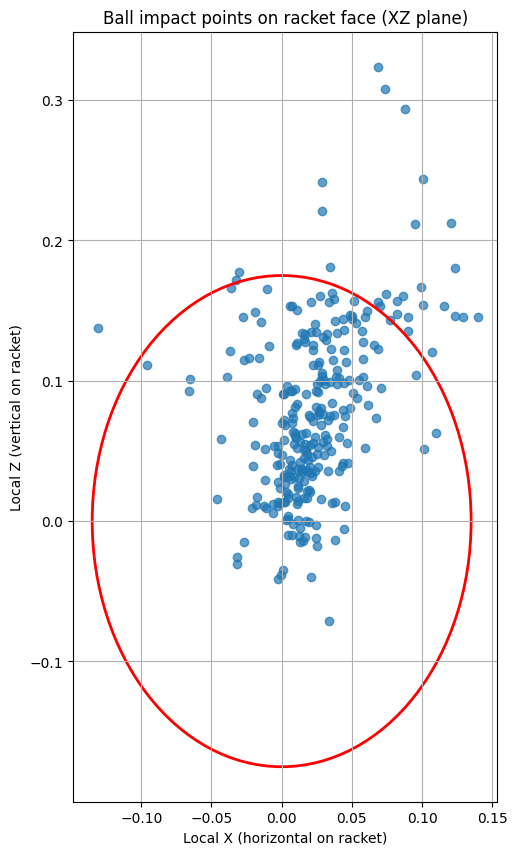

In [79]:
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np


# Transform: ball position relative to racket + rotate to local frame
local_ball_positions = []
for i in range(len(ball_pos)):
    rel_pos = ball_pos[i] - racket_pos[i]
    rel_pos -= np.dot(rel_pos, [0, 1, 0]) * np.array([0, 1, 0])
    r = R.from_quat(quaternions[i])         # racket's rotation
    local_pos = r.inv().apply(rel_pos)      # apply inverse rotation
    local_ball_positions.append(local_pos)

local_ball_positions = np.array(local_ball_positions)

# Plot impact points
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(local_ball_positions[:, 0], local_ball_positions[:, 2], alpha=0.7)

# Add ellipse for racket
ellipse = Ellipse(xy=(0, 0), width=0.27, height=0.35,
                  edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(ellipse)

# Formatting
ax.set_xlabel('Local X (horizontal on racket)')
ax.set_ylabel('Local Z (vertical on racket)')
ax.set_title('Ball impact points on racket face (XZ plane)')
ax.set_aspect('equal')
ax.grid(True)

plt.show()
